# Truth Discovery example

## Continuous Versions

### DF-QuAD

In [ ]:
import sys
sys.path.append("../")

from BAG import BAG

from semantics import QuadraticEnergyModel
from algorithms import RK4

from plotting import strengthplot

class ProductAggregation_ws:
    def __init__(self) -> None:
        pass

    def aggregate_strength(self, attackers, supporters, state):
        support_value = 1
        for a in attackers:
            support_value *= 1-state[a]

        attack_value = 1
        for s in supporters:
            attack_value *= 1-state[s]

        return support_value - attack_value

    def __str__(self) -> str:
        return __class__.__name__

ContinuousModularModel, RK4
Time: 9.89999999999998
Argument(name=s1, weight=0.5, strength=0.9999118366275332)
Argument(name=s2, weight=0.5, strength=0.9999118366275332)
Argument(name=s3, weight=0.5, strength=0.998887713004957)
Argument(name=s4, weight=0.5, strength=0.998887713004957)
Argument(name=y58, weight=0.0, strength=0.9995751937627928)
Argument(name=y62, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pb, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pl, weight=0.0, strength=0.9995751937627928)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

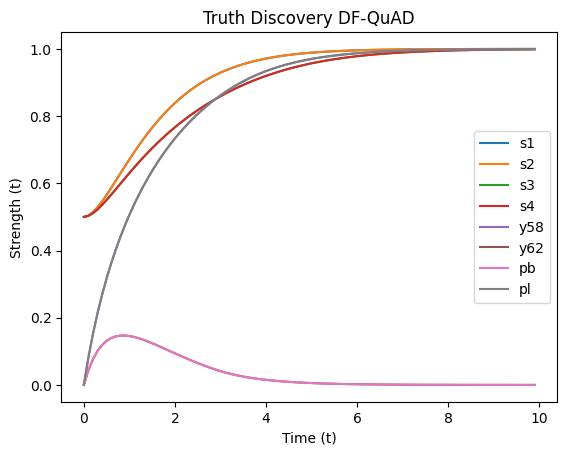

In [9]:
from semantics import modular
from semantics.ContinuousModularModel import ContinuousModularModel
# Iterative computation
model = ContinuousModularModel(ProductAggregation_ws(),  modular.LinearInfluence(conservativeness=1))
model.BAG = BAG("truth_disco.bag")
model.approximator = RK4(model)

DELTA = 10e-2
EPSILON = 10e-4
model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)

# for arg in model.BAG.arguments.values():
#     print((arg.name,arg.strength))

strengthplot(model, DELTA, EPSILON, "Truth Discovery DF-QuAD")

### Quadratic Energy

QuadraticEnergyModel, RK4
Time: 8.899999999999984
Argument(name=s1, weight=0.5, strength=0.8721688605431386)
Argument(name=s2, weight=0.5, strength=0.8721688605431386)
Argument(name=s3, weight=0.5, strength=0.7107620242585438)
Argument(name=s4, weight=0.5, strength=0.7107620242585438)
Argument(name=y58, weight=0.0, strength=0.8567572483683447)
Argument(name=y62, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pb, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pl, weight=0.0, strength=0.8567572483683447)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

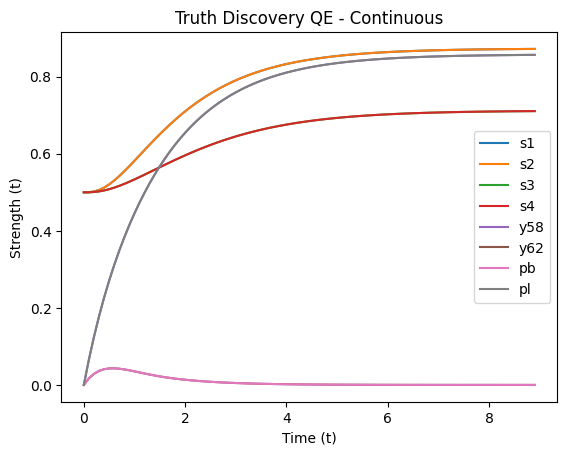

In [10]:
#from uncertainpy.argumentation.graphing import graph

model = QuadraticEnergyModel()
model.approximator = RK4(model)
model.BAG = BAG("truth_disco.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)
strengthplot(model, DELTA, EPSILON, "Truth Discovery QE - Continuous")

## Discrete Versions

### Df-QuAD

Creting BSAF: Extracting relations from arguments...

Discrete modular, iterations:  20 
-------
Aggregation:  ProductAggregation
Influence:  LinearInfluence
Set Aggregation:  SetSumAggregation
-------



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

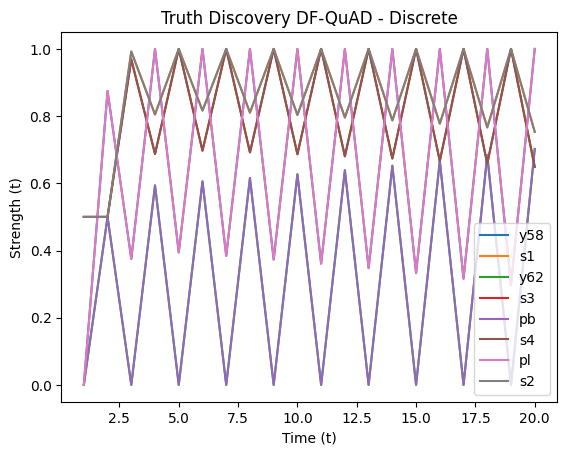

In [1]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from BSAF import BSAF
from BSAF.Argument import Argument
from ABAF.Assumption import Assumption
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation



bag = BAG("truth_disco.bag")


### Create the BSAF from the BAG

## define assumptions from the arguments keys and initial strengths
assumptions = [Assumption(arg) for arg in bag.arguments]

## retrieve the initial strengths from the arguments
for asm in assumptions:
    asm.initial_weight = bag.arguments[asm.name].strength

bsaf_args = [Argument(name=arg) for arg in bag.arguments]
for arg in bsaf_args:
    ## set the initial strength of the argument
    arg.initial_weight = bag.arguments[arg.name].strength

### Define the BSAF
bsaf = BSAF(bsaf_args, assumptions)

for sup in bag.supports:
    ## check that the support is coming from only one assumption
    if sup.supporter.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        suptr = [arg for arg in bsaf.arguments if arg.name == sup.supporter.name]
        suptd = [arg for arg in bsaf.arguments if arg.name == sup.supported.name][0]
        ## add the support to the BSAF
        bsaf.add_support(suptr, suptd)
        # print(f"Support from {suptd.name} to {suptr[0].name}")
    else:
        print("Support is not coming from only one assumption")

for att in bag.attacks:
    ## check that the attack is coming from only one assumption
    if att.attacker.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        attr = [arg for arg in bsaf.arguments if arg.name == att.attacker.name]
        attd = [arg for arg in bsaf.arguments if arg.name == att.attacked.name][0]
        ## add the attack to the BSAF
        bsaf.add_attack(attr, attd)
        # print(f"Attack from {attd.name} to {attr[0].name}")
    else:
        print("Attack is not coming from only one assumption")


model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model.solve(20, generate_plot=True)

strengthplot(model, 1, 1, "Truth Discovery DF-QuAD - Discrete")

### Does it converge if we consider acyclic frameworks?

## Flat ABA - should converge all
## Convergence of random instances 
## How many outer loops until we get stuck in the inner loop?


### QE


Discrete modular, iterations:  10 
-------
Aggregation:  SumAggregation
Influence:  QuadraticMaximumInfluence
Set Aggregation:  SetSumAggregation
-------



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

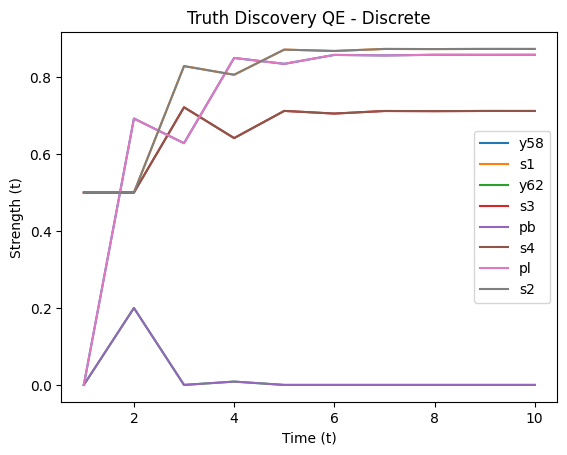

In [2]:
# print(bsaf)

from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model2.solve(10, generate_plot=True)

strengthplot(model2, 1, 1, "Truth Discovery QE - Discrete")

# Random ICCMA example

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a1, a6, a0.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a1, a3, a5.,r4[0.5]: s8 :- a3, a5.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a3, a6, a5.,r7[0.5]: s12 :- a2, a4, a6, a1, a7.,r8[0.5]: s12 :- a2, s7, a6, a0, a1.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a2, a1, a0.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- s7, a3, a0, a1, a7.,r14[0.5]: s16 :- a3, a0, s7, a5.,r15[0.5]: s16 :- a2, a7, s7, a5.,r16[0.5]: s16 :- s5, s12.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- s16, a5.,r19[0.5]: s6 :- s8, s16, a0, a5, a7.,r20[0.5]: s11 :- a6, s6, a7, s7.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- s8, a1.,r24[0.5]: s2 :- a4, s12.,r25[0.5]: s2 :- a7, a1, a0, s12.,r26[0.5]: s2 :- s14, a3, a0, s5, a5.,r27[0.5]: s10 :- a4, s12, a3, a0.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- s12, a5.,r30[0.5]: s10 :- a4, s14, s16, a3, a7.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a6, a0.,r35[0.5]: s0 :- s12.,r36[0.

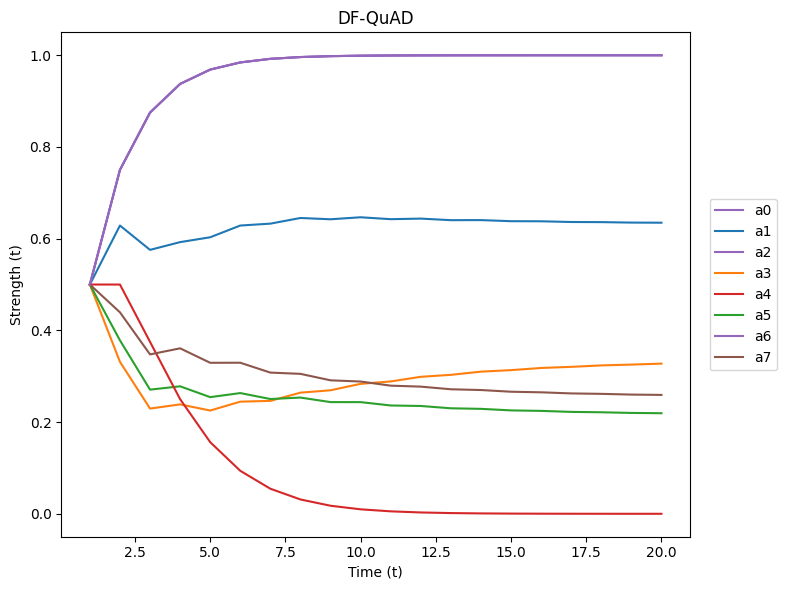

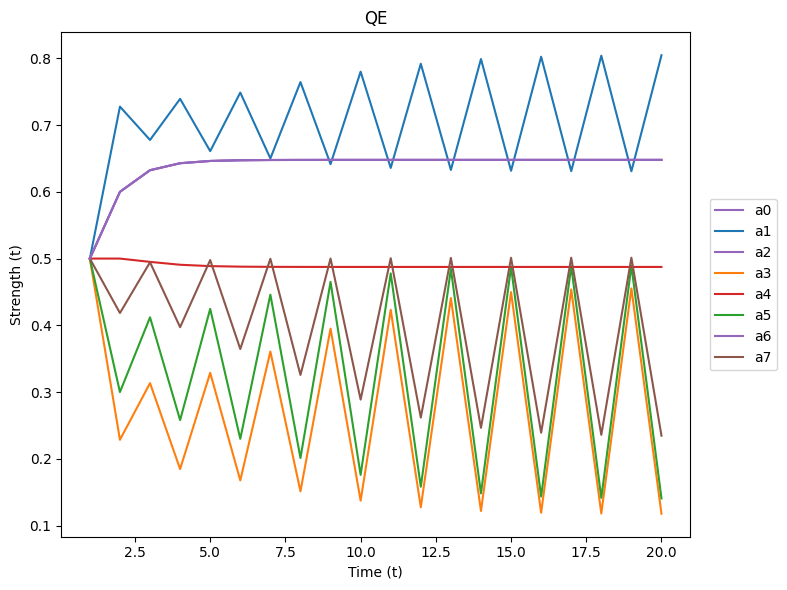

In [2]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence


## Load ICCMA example
abaf = ABAF(path="/vol/bitbucket/fr920/dependency-graph-alternative/input_data_nf/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")
# abaf = ABAF(path="ABA_ICCMA_input.iccma")


print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

bsaf = abaf.to_bsaf()

print(bsaf)

model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True)

strengthplot(model, delta=3, epsilon=1e-3,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=5)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=1e-2, last_n=5):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True)

strengthplot(model2, delta=3, epsilon=1e-3,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=1e-2, last_n=5)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=1e-2, last_n=5):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


### Check For Convergence

In [3]:
import re
import pickle
import signal
from pathlib import Path
from tqdm import tqdm
import sys
sys.path.append("../")

from ABAF import ABAF
from semantics.bsafDiscreteModular import DiscreteModular

from semantics.modular.ProductAggregation        import ProductAggregation
from semantics.modular.SetProductAggregation     import SetProductAggregation
from semantics.modular.SumAggregation            import SumAggregation
from semantics.modular.LinearInfluence           import LinearInfluence
from semantics.modular.QuadraticMaximumInfluence import QuadraticMaximumInfluence

INPUT_DIR       = Path("../../dependency-graph-alternative/input_data_nf").resolve()
OUTPUT_PKL      = "convergence_results.pkl"
MAX_FILES       = 10
MAX_SENTENCES   = 25
MIN_SENTENCES   = 0
TIMEOUT_SECONDS = 30

# helper to raise on alarm
class _Timeout(Exception):
    pass

def _alarm_handler(signum, frame):
    raise _Timeout()

def solve_with_timeout(model, iterations, timeout):
    """
    Run model.solve(...) but error out after `timeout` seconds.
    """
    # install handler
    old_handler = signal.signal(signal.SIGALRM, _alarm_handler)
    signal.alarm(timeout)
    try:
        return model.solve(iterations, generate_plot=True, verbose=False)
    finally:
        # always cancel alarm and restore handler
        signal.alarm(0)
        signal.signal(signal.SIGALRM, old_handler)


# pick only .aba with sample-size s∈[MIN_SENTENCES,MAX_SENTENCES]
pattern_s = re.compile(r"_s(\d+)_")
all_aba = sorted(INPUT_DIR.glob("*.aba"))
aba_paths = [
    p for p in all_aba
    if (m := pattern_s.search(p.name))
       and MIN_SENTENCES <= int(m.group(1)) <= MAX_SENTENCES
]
if MAX_FILES > 0:
    aba_paths = aba_paths[:MAX_FILES]

# extract s,c,n,a,r,b
param_pat = re.compile(
    r"_s(?P<s>\d+)_"
    r"c(?P<c>[\d.]+)_"
    r"n(?P<n>[\d.]+)_"
    r"a(?P<a>[\d.]+)_"
    r"r(?P<r>\d+)_"
    r"b(?P<b>\d+)"
)

results = []

for aba_path in tqdm(aba_paths, desc="Files", unit="file"):
    m = param_pat.search(aba_path.name)
    params = (
        dict(s=int(m.group("s")),
             c=float(m.group("c")),
             n=float(m.group("n")),
             a=float(m.group("a")),
             r=int(m.group("r")),
             b=int(m.group("b")))
        if m else dict(s=None, c=None, n=None, a=None, r=None, b=None)
    )

    # load once
    abaf = ABAF(path=str(aba_path)) ##TODO: Need to assign random strengths to the assumptions
    bsaf = abaf.to_bsaf()

    initial_strengths = {asm.name: asm.initial_weight 
                         for asm in bsaf.assumptions}

    runs = [
      ("DF-QuAD", {"aggregation": ProductAggregation(),
                   "influence":   LinearInfluence(conservativeness=1),
                   "set_aggregation": SetProductAggregation()}),
      ("QE",      {"aggregation": SumAggregation(),
                   "influence":   QuadraticMaximumInfluence(conservativeness=1),
                   "set_aggregation": SetProductAggregation()})
    ]

    for model_name, cfg in runs:
        entry = {
            "file":              aba_path.name,
            "file_path":         str(aba_path),
            "model":             model_name,
            **params,
            "initial_strengths": initial_strengths,
            "final_strengths":   None,
            "global_converged":  None,
            "prop_converged":    None,
            "per_arg":           None,
            "timeout":           False
        }

        model = DiscreteModular(
            BSAF=bsaf,
            aggregation=cfg["aggregation"],
            influence=cfg["influence"],
            set_aggregation=cfg["set_aggregation"]
        )

        try:
            final_state = solve_with_timeout(model, 20, TIMEOUT_SECONDS)
        except _Timeout:
            entry["timeout"] = True
            print(f"Timeout: {aba_path.name} ({model_name})")
        else:
            final_strengths = {
                asm.name: final_state[asm]
                for asm in model.assumptions
            }
            per_arg     = model.has_converged(epsilon=1e-3, last_n=5)
            global_conv = model.is_globally_converged(epsilon=1e-3, last_n=5)
            total       = len(per_arg)
            num_conv    = sum(per_arg.values())
            prop_conv   = (num_conv/total) if total else 0.0

            entry.update({
                "final_strengths":  final_strengths,
                "global_converged": global_conv,
                "prop_converged":   prop_conv,
                "per_arg":          per_arg
            })

        results.append(entry)

    # flush to disk after each file
    with open(OUTPUT_PKL, "wb") as pf:
        pickle.dump(results, pf)

print("Done – partial results in", OUTPUT_PKL)


Files: 100%|██████████| 10/10 [00:00<00:00, 96.27file/s]

Building arguments procedurally…
0.00s to build 33 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 27 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.02s to build 50 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 42 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 36 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 68 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 54 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.00s to build 64 arguments
Creating BSAF: Extracting relations from arguments...
Building arguments procedurally…
0.01s to build 68 arguments
Creating BSAF: Extr

In [ ]:
import pickle

with open("convergence_results.pkl","rb") as pf:
    results = pickle.load(pf)

for run in results:
    print(run["file"], run["model"], 
          "→", run["prop_converged"], "prop converged")
    
    # … your existing loop …

# ─── Summary of timeouts ─────────────────────────────────────────────
total_runs    = len(results)
total_timeouts= sum(1 for e in results if e["timeout"])
print(f"\nOverall timeouts: {total_timeouts}/{total_runs} "
      f"({total_timeouts/total_runs:.1%})")

# breakdown by model
for model_name in sorted({e["model"] for e in results}):
    subset        = [e for e in results if e["model"] == model_name]
    to_m          = sum(1 for e in subset if e["timeout"])
    print(f"  {model_name}: {to_m}/{len(subset)} ({to_m/len(subset):.1%})")



non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_0.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_0.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_1.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_1.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_2.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_2.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_3.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_3.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_4.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b10_4.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b5_0.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b5_0.aba QE → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b5_1.aba DF-QuAD → 1.0 prop converged
non_flat_1_s25_c0.02_n0.2_a0.1_r10_b5_1.aba QE → 1.0 prop converged
non